# SAN FRANCISCO CRIME DATASET

## Conocimiento del Dataset

Vamo a proceder a realizar un primer análisis de los datos que tenemos, queremos conocer que tamaño tiene mi dataset, que variables tengo y que tipo de información voy a poder extraer de estos datos.

In [ ]:
# Importamos librerías generales
import numpy as np
import pandas as pd
import pandas_profiling #Me genera un reporte automatico

In [2]:
# Importamos librerías visuales para realizar gráficos
import matplotlib.pyplot as plt
import seaborn  as sns
import folium
import squarify

In [4]:
# Creamos el camino hasta el directorio para poder cargar la base de datos
SFcrime = pd.read_csv('Incidencias_policia_SF.csv') # Recordar meter tanto el fichero python con la base de datos

In [5]:
SFcrime.head

<bound method NDFrame.head of         IncidntNum        Category  \
0        120058272     WEAPON LAWS   
1        120058272     WEAPON LAWS   
2        141059263        WARRANTS   
3        160013662    NON-CRIMINAL   
4        160002740    NON-CRIMINAL   
...            ...             ...   
150495   161061000         ASSAULT   
150496   176000742    NON-CRIMINAL   
150497   176000758   LARCENY/THEFT   
150498   176000764   LARCENY/THEFT   
150499   179002868  OTHER OFFENSES   

                                                 Descript DayOfWeek  \
0                               POSS OF PROHIBITED WEAPON    Friday   
1          FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE    Friday   
2                                          WARRANT ARREST    Monday   
3                                           LOST PROPERTY   Tuesday   
4                                           LOST PROPERTY    Friday   
...                                                   ...       ...   
150495          

In [7]:
report = pandas_profiling.ProfileReport(SFcrime)
report # Me da una primera vista del dataset 

In [8]:
SFcrime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [21]:
SFcrime.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

Observamos que tenemos 13 variables:

    1) IncidntNum: Que nos indica el número de incidente al cual se le asigna el crimen.
    2) Category: Me indica el tipo de crimen que es.
    3) Descript: Breve descripición del crimen.
    4) DayOfWeek: El día de la semana en la que ha ocurrido el crimen.
    5) Date: Fecha y hora exacta en la que han ocurrido los crimenes,
    6) Time: Hora exacta en la que se ha cometido el crimen.
    7) PdDistrict: Distrito en el que ha ocurrido el crimen.
    8) Resolution: Como ha finalizado el incidente.
    9) Address: Dirección en donde ha ocurrido el incidente.
    10) X: Latitud del lugar del incidente.
    11) Y: Longitud del lugar del incidente.
    12) Location: Lugar en forma de coordenadas del incidente.
    13) Pdld: 

In [10]:
SFcrime.shape

(150500, 13)

In [12]:
SFcrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [13]:
SFcrime.isnull()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150495,False,False,False,False,False,False,False,False,False,False,False,False,False
150496,False,False,False,False,False,False,False,False,False,False,False,False,False
150497,False,False,False,False,False,False,False,False,False,False,False,False,False
150498,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
SFcrime.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

In [19]:
SFcrime['PdDistrict'].fillna(SFcrime['PdDistrict'].mode()[0], inplace = True)
SFcrime.isnull().any().any()

False

Una vez que he identificado y entendido los datos que se encuentran dentro de SFcrime, procedere a realizar mi análisis exploratorio.


## Propósito de mi Trabajo


¿Cuales son mis objetivos o propósitos y que información espero sacar de ellos?

Mi proposito es ponerme en la piel del Jefe de Policía del Departamento de San Francisco y a partir de la información que he extraido de mi dataset conocer cuales son los principales crimenes en mi ciudad, como de eficiente esta siendo mi departamento para resolver los crimenes y que zonas son las más afectadas.

## Principales crimenes en la ciudad de San Francisco

C:\Users\carlo\Anaconda3\envs\SFcrime\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


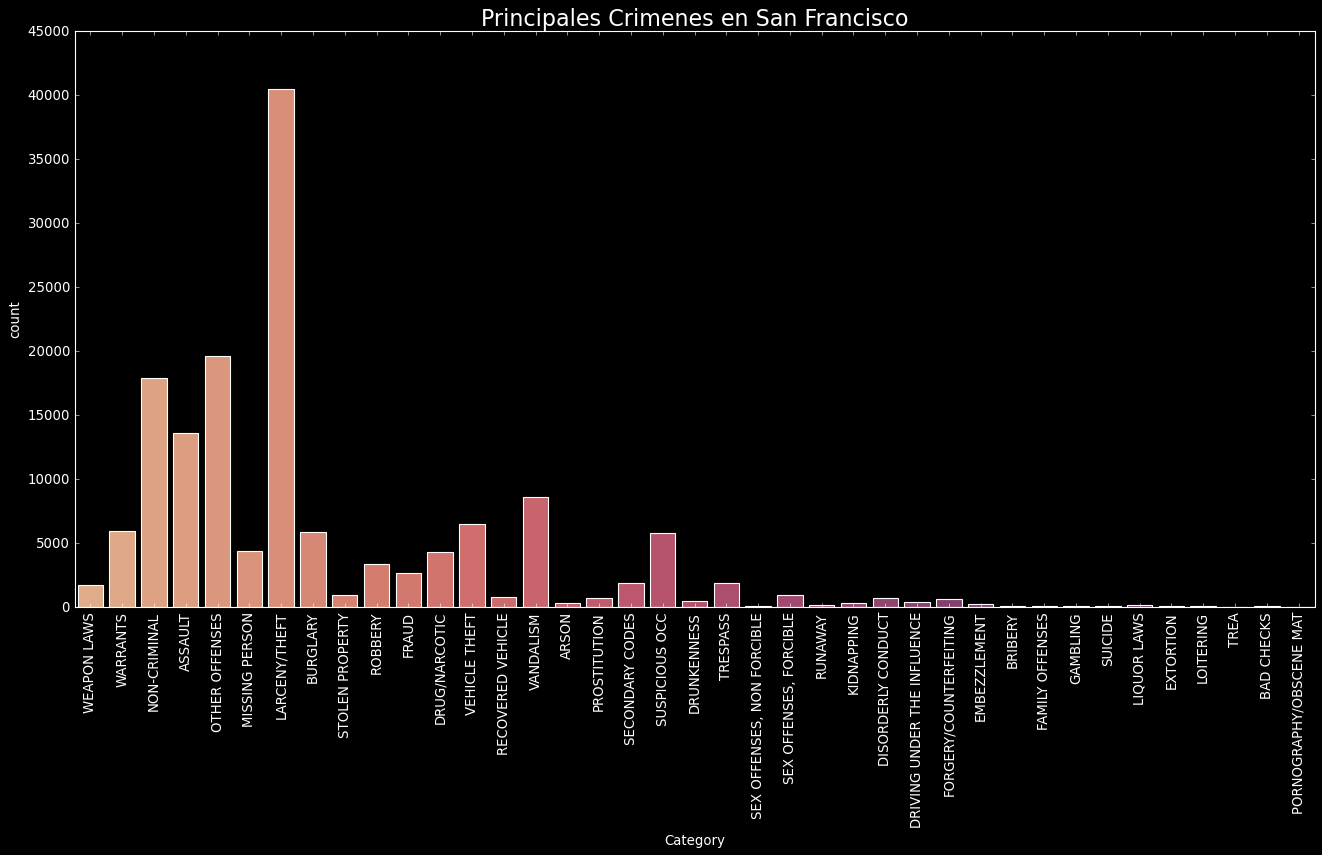

In [160]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(SFcrime['Category'], palette = 'flare')

plt.title('Principales Crimenes en San Francisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [164]:
SFcrime['Category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [165]:
SFcrime['Category'].value_counts().head(10)

LARCENY/THEFT     40409
OTHER OFFENSES    19599
NON-CRIMINAL      17866
ASSAULT           13577
VANDALISM          8589
VEHICLE THEFT      6419
WARRANTS           5914
BURGLARY           5802
SUSPICIOUS OCC     5782
MISSING PERSON     4338
Name: Category, dtype: int64

Esta gráfica me permite conocer cuales son los principales crimenes en la ciudad de San Francisco. Procedemos a ver cuales son los 10 crimenes que más se cometen en la ciudad.
De casi 150 mil casos 40 mil son por robo, lo que como Jefe me hace pensar que una nueva medida que tendría que obtener de cara a reducir este tipo de crimen es aumentar las patrullas de vigilancia, tanto andando como en coche.

La pregunta es pero ¿Dónde aumento la vigilancia?¿En que distritos?
Es lo que vamos a responder ahora

## Distritos con mayores crimenes de la ciudad de San Francisco

Una vez que conocemos cuales son los principales crimenes de la Ciudad de San Francisco, queremos conocer cuales son los distritos más afectados por la criminalidad.

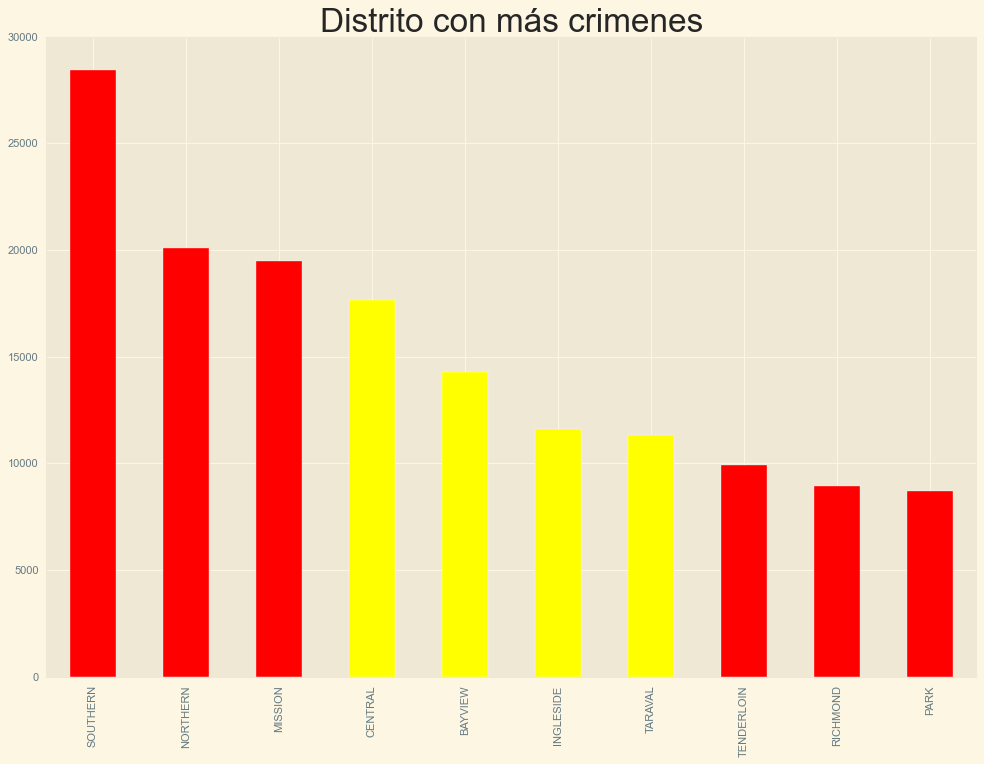

In [69]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.spring(np.linspace(0, 1, 15))
SFcrime['PdDistrict'].value_counts().plot.bar(color = ['red','red','red','yellow','yellow','yellow','yellow','red','red','red'], figsize = (15, 10))

plt.title('Distrito con más crimenes',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

Graficamente podemos observar que los principales distritos que se ven afectados son los siguientes:

    1) Southern
    2) Northern
    3) Mission
    4) Central
    5) Bayview

Ahora bien, no conocemos exactamente cual es el número exacto de crimenes que ocurren dentro de estos distritos

In [101]:
t = SFcrime.PdDistrict.value_counts()

SFdistictcrime = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
SFdistictcrime = SFdistictcrime.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

SFdistictcrime = SFdistictcrime.reset_index()
SFdistictcrime.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

SFdistictcrime

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [102]:
SFdistictcrime.sort_values(by = 'Count', ascending = False)

,Neighborhood,Count
3,SOUTHERN,28446
1,NORTHERN,20100
4,MISSION,19503
0,CENTRAL,17666
9,BAYVIEW,14303
8,INGLESIDE,11594
7,TARAVAL,11325
5,TENDERLOIN,9942
6,RICHMOND,8922
2,PARK,8699


Graficamente hemos podido comprobar cuales eran los distritos más afectados por el crimen, ahoro conocemos núemericamente cuantos crimenes han ocurrido en cada distrito.

        - Southern: 28.446 crimenes
        - Northern: 20.100 crimenes
        - Mission:  19.503 crimenes
        - Central:  17.666 crimenes
        - Bayview:  14.303 crimenes

Ahora queremos conocer cual es el peso de cada uno de los distritos sobre la ciudad de San Francisco

In [103]:
SFdistictcrime['Count'].astype(int)

0    17666
1    20100
2     8699
3    28446
4    19503
5     9942
6     8922
7    11325
8    11594
9    14303
Name: Count, dtype: int32

In [104]:
SFdistictcrime['Count'].sum()

150500

In [105]:
SFdistictcrime['Peso relativo'] = SFdistictcrime['Count']/SFdistictcrime['Count'].sum()

In [106]:
SFdistictcrime

,Neighborhood,Count,Peso relativo
0,CENTRAL,17666,0.117382
1,NORTHERN,20100,0.133555
2,PARK,8699,0.057801
3,SOUTHERN,28446,0.189010
4,MISSION,19503,0.129588
5,TENDERLOIN,9942,0.066060
6,RICHMOND,8922,0.059282
7,TARAVAL,11325,0.075249
8,INGLESIDE,11594,0.077037
9,BAYVIEW,14303,0.095037


In [107]:
SFdistictcrime.sort_values(by = 'Peso relativo', ascending = False)

,Neighborhood,Count,Peso relativo
3,SOUTHERN,28446,0.189010
1,NORTHERN,20100,0.133555
4,MISSION,19503,0.129588
0,CENTRAL,17666,0.117382
9,BAYVIEW,14303,0.095037
8,INGLESIDE,11594,0.077037
7,TARAVAL,11325,0.075249
5,TENDERLOIN,9942,0.066060
6,RICHMOND,8922,0.059282
2,PARK,8699,0.057801


Vemos que casi el 50% de los crimenes de San Francisco se concentran en estos tres distritos:

        1) Southern con un peso del 18,90%
        2) Northern con un peso del 13,35%
        3) Mission con un peso del 12,95%

Ya se cuales son los crimenes que mas ocurren en mi ciudad y en que distritos tienen altas incidencias.
Pero ahora quiero ver si existe una zona más reducida de tamaño donde agrupe una gran cantidad de crimes.

Una vez que hemos comprobado las zonas más afectadas de San Francisco, vamos a proceder a ver cual ha sido la resolución de los crimenes

## Barrios más afectados por el crimen

Intento localizar cuales son los barrios donde más crimenes han ocurrido

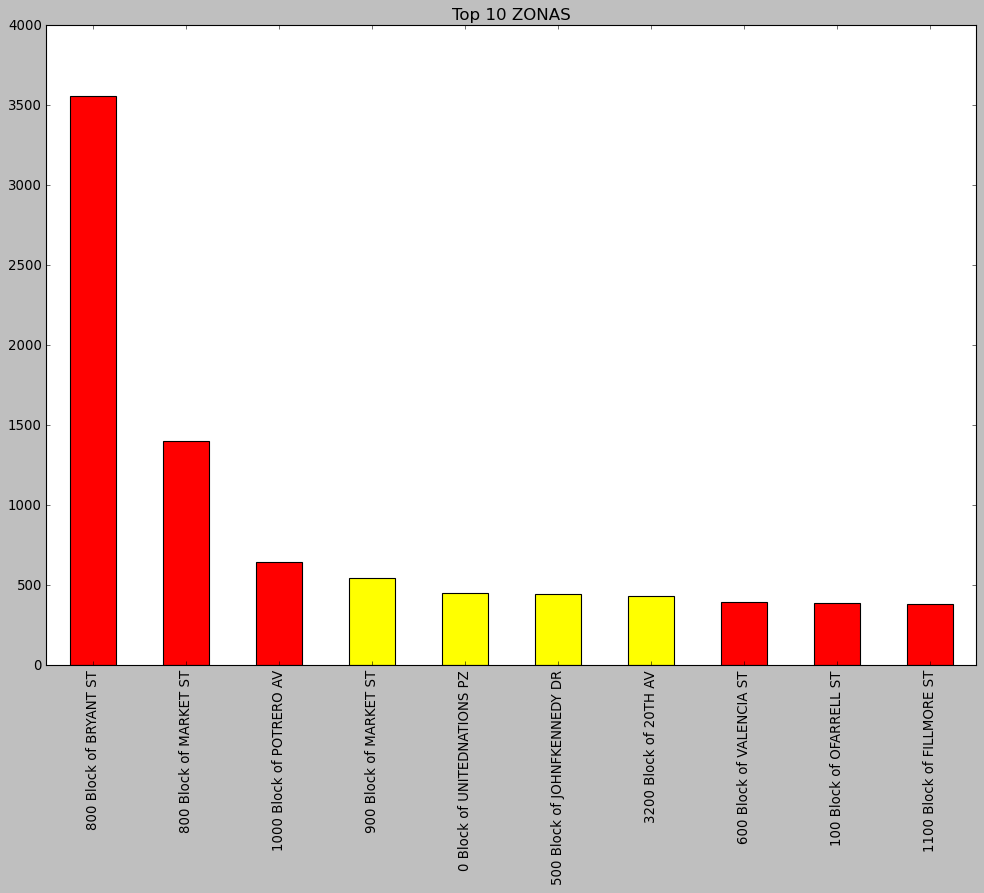

In [167]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('classic')

color = plt.cm.ocean(np.linspace(0, 5, 10, 15))
SFcrime['Address'].value_counts().head(10).plot.bar(color = ['red','red','red','yellow','yellow','yellow','yellow','red','red','red'], figsize = (15, 10))

plt.title('Top 10 ZONAS',fontsize = 15)

plt.xticks(rotation = 90)
plt.show()

In [168]:
SFcrime['Address'].value_counts().head(10)

800 Block of BRYANT ST          3561
800 Block of MARKET ST          1405
1000 Block of POTRERO AV         644
900 Block of MARKET ST           547
0 Block of UNITEDNATIONS PZ      452
500 Block of JOHNFKENNEDY DR     448
3200 Block of 20TH AV            431
600 Block of VALENCIA ST         399
100 Block of OFARRELL ST         389
1100 Block of FILLMORE ST        382
Name: Address, dtype: int64

Observamos que las dos calles donde más crimenes ocurren se encuentran en el Southern District, que es la zona con más % de crimes de toda la ciudad de San Francisco.

Como Jefe de Policía me interesa aumentar la vigilancia en esta zona para intentar reducir el indice de criminalidad.

In [169]:
gjson = r'https://cocl.us/sanfran_geojson' # Es un codigo que te permite descargarte el mapa de san francisco
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12) # Esta funcion te permite moverte por el mundo poniendo las coordendas que quieras
# Por ejemplo location = [10.77, -13.42] me lleva a Africa

In [170]:
sf_map.choropleth(
    geo_data=gjson, #gjson contiene la información geometrica de los Estados de EE.UU.
    data=SFdistictcrime,
    columns=['Neighborhood', 'Count'], # Con esto le indico que mis columnas son el neighberhood y el count de mi tabla
    key_on='feature.properties.DISTRICT', # de tal manera que sabe en que distritos ha ocurrido los crimenes
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.1,
    legend_name='% Crimenes en San Francisco'
)

sf_map

C:\Users\carlo\Anaconda3\envs\SFcrime\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


La zona roja que vemos en el mapa corresponden a los distritos:

    1) Southern
    2) Northern
    3) Mission

Y dentro de el distrito Southern encontramos las calles:
  
    1) 800 Block of BRYANT ST
    2) 800 Block of MARKET ST

Ahora que he visto las zonas más afectadas de la ciudad, quiero ver cual ha sido la efectividad de todos mis departamenos

## Efectividad del Departamento

Voy a medir la efectividad de mi departamento, con la capacidad que tiene mi departamento de resolver estos incidentes

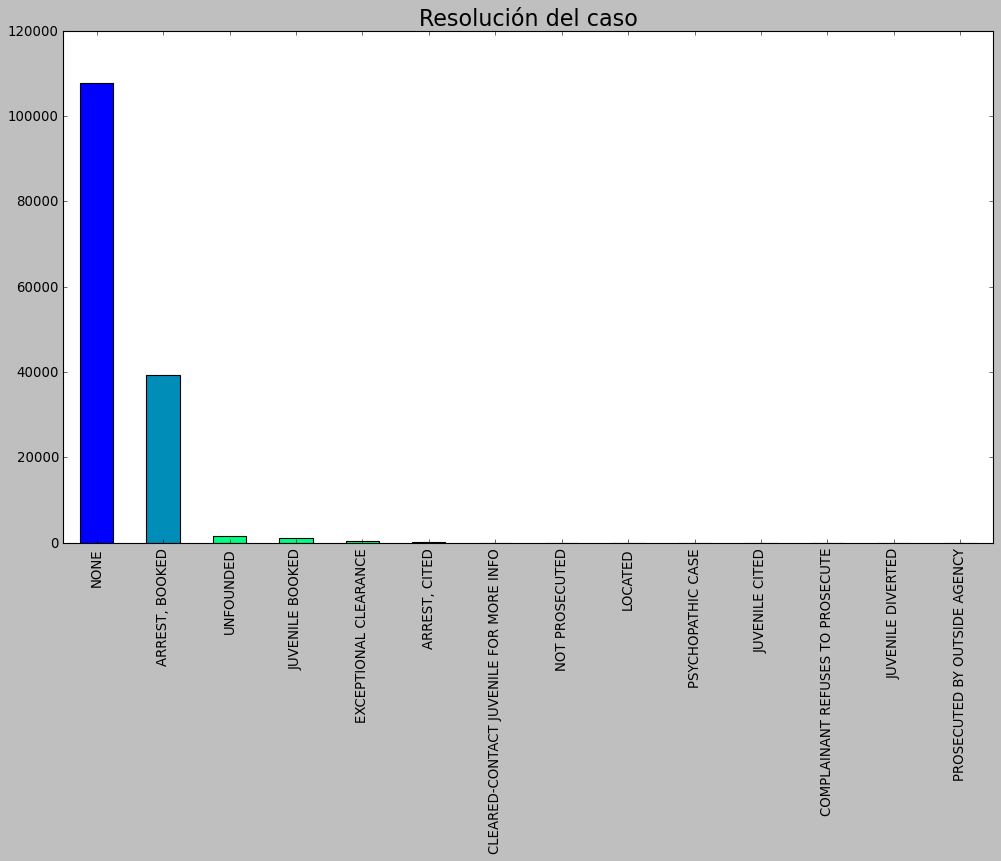

In [119]:
plt.style.use('classic')

color = plt.cm.winter(np.linspace(0, 5, 10, 20))
SFcrime['Resolution'].value_counts().plot.bar(color = color, figsize = (15, 8))

plt.title('Resolución del caso',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [136]:
SFrescrime = SFcrime['Resolution'].value_counts()
SFrescrime

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
COMPLAINANT REFUSES TO PROSECUTE               2
JUVENILE DIVERTED                              2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

Observamos que la mayoría de los crimenes han acabado sin ningún tipo de acción policial, la duda que obtenemos en este dataset es el significado del 'None', es decir 'None' significa que el altercado ha terminado sin ningún tipo de incidente o dentro de este nono podemos encontrar casos que no han sido resueltos.

Por la información que obtenemos del resto de variable categoricas, nos hace pensar que dentro de este 'None' tenemos caso sin resolver. Si este fuese el caso la información que nos estan proporcionando no esta lo suficientemente aclarada, porque si yo fuese a estudiar la efectividad del Departamento de Policía de San Franciso podrían pasar dos escenarios.

El primero en el que entiendo que 'None' supone que son casos en los que la policía ha intervenido y ha resuleto el   problema de manera pacifica, lo que daría una imagen de efectividad y eficiencia por parte del departamento.

El segundo que en 'None' son los casos sin resolver, lo que llevaría a dar una imagen de ineficiencia e ineficacia por parte del Departamento

Por lo que el próximo año quiero que estos 'None' esten mejor explicadas

## Conclusión

    1) Aumentar la vigilancia en los tres distritos.
    2) Mejorar la calidad de los datos recogidos por los departamentos.